In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
os.chdir("/content/drive/MyDrive/DS/SentimentAnalysis")

In [3]:
!ls

 DATA.csv  'Ukraine Russia War Twitter Sentiment Analysis.ipynb'


In [4]:
df = pd.read_csv("DATA.csv")

In [5]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1562610597581438977,1562493264464187394,2022-08-25 01:19:33 UTC,2022-08-25,01:19:33,0,825190326126120960,rjrro,RJRRO,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RussianEmbassyC', 'name': 'R...",NaN,NaN,NaN,NaN
1,1562610583806955527,1562610583806955527,2022-08-25 01:19:29 UTC,2022-08-25,01:19:29,0,1543715151765016576,hakunarebel,النمر الأبيض🐆,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1562610559903625216,1562610559903625216,2022-08-25 01:19:24 UTC,2022-08-25,01:19:24,0,23352368,desertblues,Jack Bennett,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1562610557072470017,1562610557072470017,2022-08-25 01:19:23 UTC,2022-08-25,01:19:23,0,2295997100,duchessfrida,Deb (aka Frida),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1562610549221130242,1562493264464187394,2022-08-25 01:19:21 UTC,2022-08-25,01:19:21,0,825190326126120960,rjrro,RJRRO,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RussianEmbassyC', 'name': 'R...",NaN,NaN,NaN,NaN


In [6]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.000700e+04,1.000700e+04,10007.0,1.000700e+04,10007.000000,10007.000000,10007.000000,10007.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.562585e+18,1.560959e+18,0.0,7.761159e+17,0.466673,0.809633,3.470970,0.114020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.367738e+13,2.476230e+16,0.0,6.657959e+17,3.608054,24.279208,76.197404,0.317852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.562563e+18,8.137979e+17,0.0,6.760830e+05,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.562573e+18,1.562451e+18,0.0,7.422977e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.562585e+18,1.562564e+18,0.0,9.801965e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.562597e+18,1.562583e+18,0.0,1.446747e+18,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.562611e+18,1.562611e+18,0.0,1.562608e+18,188.000000,2275.000000,6193.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10007 non-null  int64  
 1   conversation_id  10007 non-null  int64  
 2   created_at       10007 non-null  object 
 3   date             10007 non-null  object 
 4   time             10007 non-null  object 
 5   timezone         10007 non-null  int64  
 6   user_id          10007 non-null  int64  
 7   username         10007 non-null  object 
 8   name             10007 non-null  object 
 9   place            1 non-null      object 
 10  tweet            10007 non-null  object 
 11  language         10007 non-null  object 
 12  mentions         10007 non-null  object 
 13  urls             10007 non-null  object 
 14  photos           10007 non-null  object 
 15  replies_count    10007 non-null  int64  
 16  retweets_count   10007 non-null  int64  
 17  likes_count 

In [8]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10006
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9217
video                  0
thumbnail           8866
near               10007
geo                10007
source             10007
user_rt_id         10007
user_rt            10007
retweet_id         10007
reply_to               0
retweet_date       10007
translate          10007
trans_src          10007
trans_dest         10007
dtype: int64

In [9]:
df.isnull

<bound method DataFrame.isnull of                         id      conversation_id               created_at  \
0      1562610597581438977  1562493264464187394  2022-08-25 01:19:33 UTC   
1      1562610583806955527  1562610583806955527  2022-08-25 01:19:29 UTC   
2      1562610559903625216  1562610559903625216  2022-08-25 01:19:24 UTC   
3      1562610557072470017  1562610557072470017  2022-08-25 01:19:23 UTC   
4      1562610549221130242  1562493264464187394  2022-08-25 01:19:21 UTC   
...                    ...                  ...                      ...   
10002  1562563052738052097  1562052991988924416  2022-08-24 22:10:37 UTC   
10003  1562563052125720577  1562479651150508035  2022-08-24 22:10:37 UTC   
10004  1562563050993250306  1562420482690887684  2022-08-24 22:10:37 UTC   
10005  1562563050703441924  1562563050703441924  2022-08-24 22:10:36 UTC   
10006  1562563049168699392  1562563049168699392  2022-08-24 22:10:36 UTC   

             date      time  timezone              us

# Final Dataset

In [10]:
data = df[["username", "tweet", "language"]] 

In [11]:
data

,username,tweet,language
0,rjrro,@RussianEmbassyC @mfa_russia @RussiaUN @missio...,qme
1,hakunarebel,Great now speak about how Russia is in Syria c...,en
2,desertblues,DOJ releases secret Russia probe memo recommen...,en
3,duchessfrida,The world stands on a nuclear precipice – we m...,en
4,rjrro,@RussianEmbassyC @mfa_russia @RussiaUN @missio...,qme
...,...,...,...
10002,jerluk1,@cgbalbin @apmassaro3 Without the allies suppo...,en
10003,bdmercer6mercer,@WorstCassie I stand with Russia.,en
10004,madeinshoes1,"@AntonioCunha79 Que post ridículo, Stalin foi ...",pt
10005,realnorac,"""The head of the LDPR party in Russia, Leonid ...",en


In [12]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [13]:
data["language"].value_counts()

en     8570
pt      415
it      218
qme     184
ru       98
ja       90
und      83
in       67
zh       46
es       44
ca       28
qht      17
cs       14
de       13
fr       10
hi        9
ro        9
ar        9
pl        9
th        8
qam       7
fi        7
nl        6
et        6
tr        5
zxx       5
vi        4
tl        4
ko        3
sv        3
da        3
uk        3
lt        2
no        2
bg        1
is        1
art       1
cy        1
ht        1
eu        1
Name: language, dtype: int64

In [14]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]  
  text = " ".join(text)
  return text

In [20]:
data["tweet"] = data["tweet"].apply(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

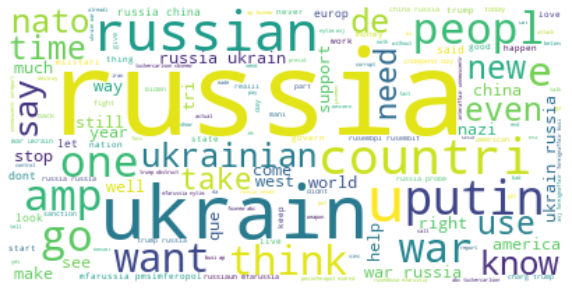

In [29]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()